<a href="https://colab.research.google.com/github/vidyasri03/Machine-Learning/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

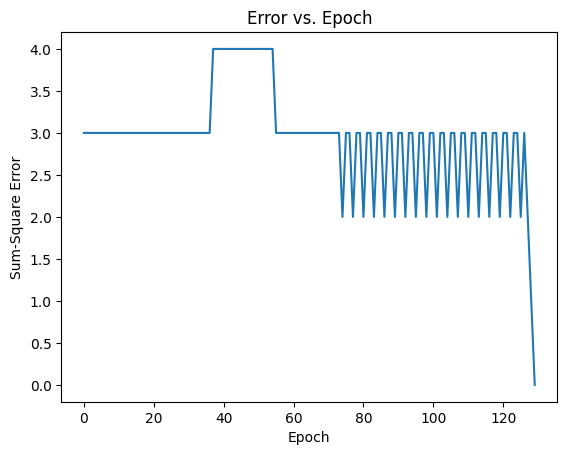

Activation Function: Step
Weights: [0.1  0.05]
Bias: -0.10000000000000765



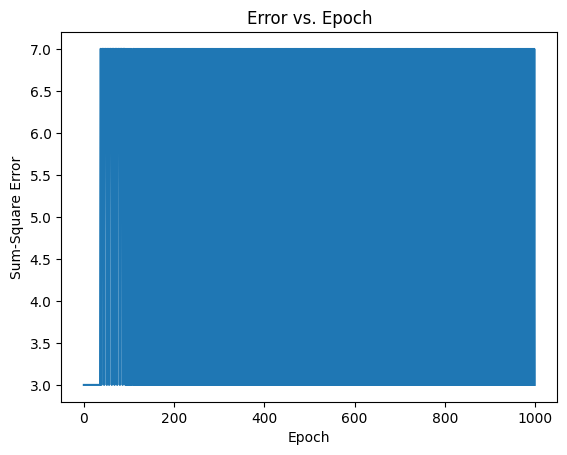

Activation Function: Bipolar Step
Weights: [0.1  0.05]
Bias: -0.0999999999999975



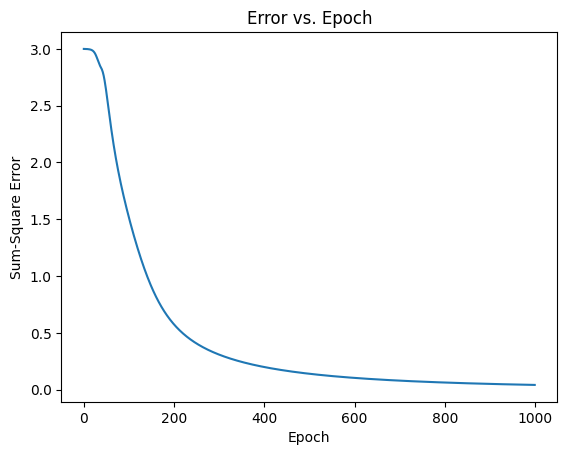

Activation Function: Sigmoid
Weights: [3.97083321 3.96394835]
Bias: -6.1353130787344305



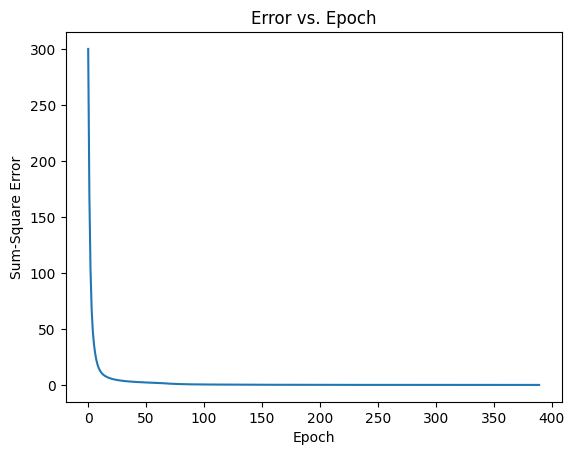

Activation Function: ReLU
Weights: [0.95116001 0.94981086]
Bias: -0.9277447198109581



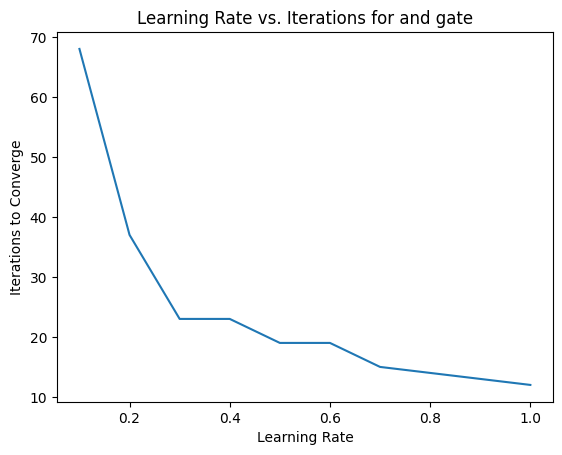

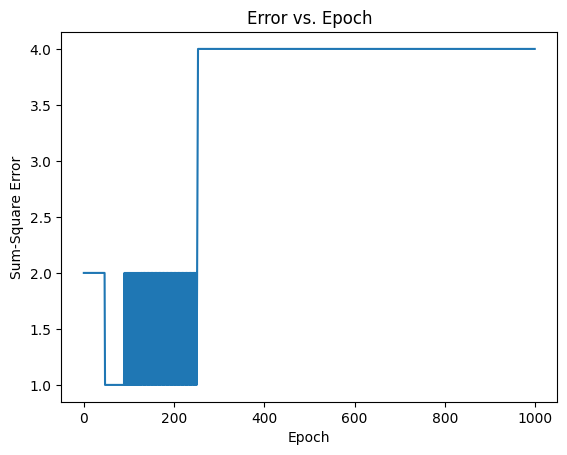

Activation Function: Step
Weights: [-0.1 -0.1]
Bias: 0.09999999999999236



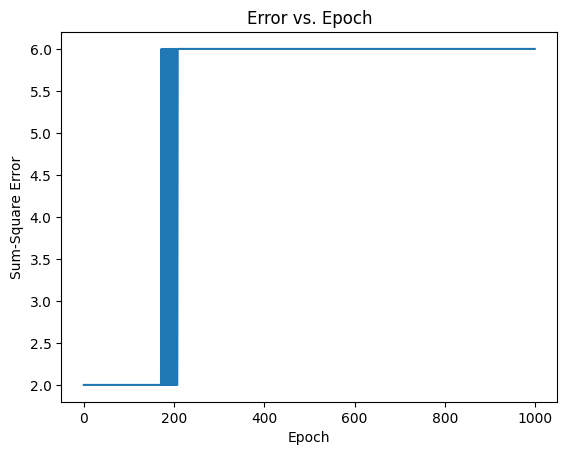

Activation Function: Bipolar Step
Weights: [-0.1  -0.15]
Bias: 0.1999999999999919



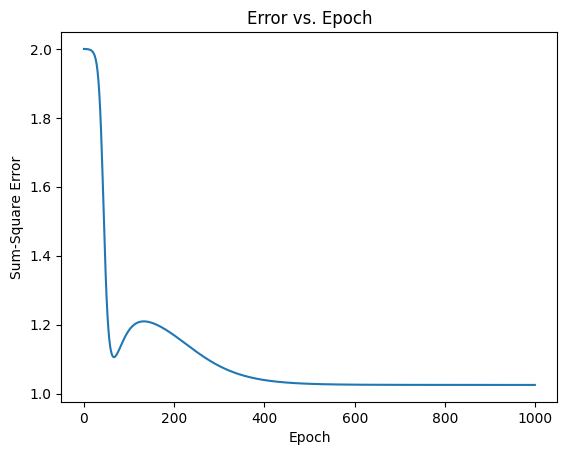

Activation Function: Sigmoid
Weights: [-0.05348673 -0.02819591]
Bias: 0.02876922691700229



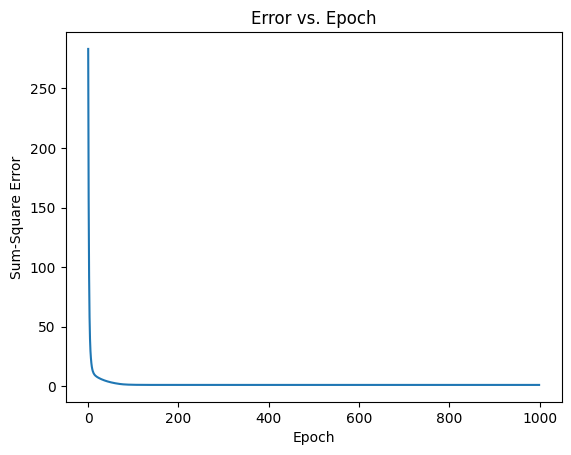

Activation Function: ReLU
Weights: [-0.05263158 -0.02631579]
Bias: 0.526315789473727

Trained weights: [-0.18250271389279019, -1.3365214891771673, 9.012435167930922, -0.0533006109983556]
Epochs: 122
AND Gate Training (Output size = 1) complete. Final error: 0.18060445694525612
Number of epochs: 999
AND Gate Predictions (Output size = 1):
[[0.25239744]
 [0.26712574]
 [0.26978361]
 [0.28271814]]

AND Gate Training (Output size = 2) complete. Final error: 0.14769313333772488
Number of epochs: 999
AND Gate Predictions (Output size = 2):
[[0.82639676 0.17886612]
 [0.73978326 0.25755316]
 [0.72967594 0.2650305 ]
 [0.64029011 0.3431596 ]]

XOR Gate Training (Output size = 1) complete. Final error: 0.25015379706407953
Number of epochs: 999
XOR Gate Predictions (Output size = 1):
[[0.50332498]
 [0.50417333]
 [0.49677975]
 [0.49820072]]

XOR Gate Training (Output size = 2) complete. Final error: 0.2500828545770328
Number of epochs: 999
XOR Gate Predictions (Output size = 2):
[[0.49325209 0.50314

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# A1: Functions for various modules

# a) Summation Unit
def summation_unit(inputs, weights):
    return sum(i * w for i, w in zip(inputs, weights))

# b) Activation Units
def step_activation(x):
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def tanh_activation(x):
    return np.tanh(x)

def relu_activation(x):
    return max(0, x)

def leaky_relu_activation(x, alpha=0.01):
    return x if x > 0 else alpha * x

# c) Comparator Unit for Error Calculation
def comparator_unit(predicted, actual):
    return actual - predicted

#  Perceptron Model Implementation with Two Output Nodes

class Perceptron:
    def __init__(self, activation_function, learning_rate=0.05, epochs=1000, convergence_threshold=0.002, output_size=2):
        self.activation_function = activation_function
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.convergence_threshold = convergence_threshold
        self.output_size = output_size

    def fit(self, inputs, targets, initial_weights, initial_bias):
        self.weights = np.array(initial_weights)
        self.bias = initial_bias
        self.errors_history = []

        for epoch in range(self.epochs):
            total_error = 0
            for input_vector, target in zip(inputs, targets):
                weighted_sum = summation_unit([1] + list(input_vector), [self.bias] + list(self.weights))
                output = self.activation_function(weighted_sum)
                error = comparator_unit(output, target)
                total_error += np.sum(error ** 2)

                # Update weights and bias
                self.weights += self.learning_rate * error * np.array(input_vector)
                self.bias += self.learning_rate * error

            self.errors_history.append(total_error)
            if total_error <= self.convergence_threshold:
                break

        return self.weights, self.bias

    def plot_error(self):
        plt.plot(self.errors_history)
        plt.xlabel('Epoch')
        plt.ylabel('Sum-Square Error')
        plt.title('Error vs. Epoch')
        plt.show()


def train_perceptron_customers(data, labels, epochs=1000, lr=0.05):
      weights = [0.1, 0.2, 0.3, 0.4]  # Example initial weights
      for epoch in range(epochs):
          total_error = 0
          for i in range(len(data)):
              summation = summation_unit([1] + data[i], weights)
              prediction = sigmoid_activation(summation)
              error = comparator_unit(prediction, labels[i])
              total_error += error ** 2
              for j in range(len(weights)):
                  weights[j] += lr * error * ([1] + data[i])[j]
          if total_error <= 0.002:
              break
      return weights, epoch


#  Neural Network Model Implementation

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.05, epochs=1000, convergence_threshold=0.002):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.convergence_threshold = convergence_threshold

        # Initialize weights with small random values
        self.weights_input_hidden = np.random.rand(self.input_size + 1, self.hidden_size)
        self.weights_hidden_output = np.random.rand(self.hidden_size + 1, self.output_size)

    def forward(self, inputs):
        inputs_with_bias = np.hstack([np.ones((inputs.shape[0], 1)), inputs])

        self.hidden_input = np.dot(inputs_with_bias, self.weights_input_hidden)
        self.hidden_output = sigmoid(self.hidden_input)

        hidden_with_bias = np.hstack([np.ones((self.hidden_output.shape[0], 1)), self.hidden_output])

        self.output_input = np.dot(hidden_with_bias, self.weights_hidden_output)
        self.output = sigmoid(self.output_input)
        return self.output

    def backward(self, inputs, targets):
        output_error = targets - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = np.dot(output_delta, self.weights_hidden_output[1:, :].T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        hidden_with_bias = np.hstack([np.ones((self.hidden_output.shape[0], 1)), self.hidden_output])
        self.weights_hidden_output += np.dot(hidden_with_bias.T, output_delta) * self.learning_rate

        inputs_with_bias = np.hstack([np.ones((inputs.shape[0], 1)), inputs])
        self.weights_input_hidden += np.dot(inputs_with_bias.T, hidden_delta) * self.learning_rate

    def train(self, inputs, targets):
        inputs = np.array(inputs)
        targets = np.array(targets).reshape(-1, self.output_size)

        for epoch in range(self.epochs):
            self.forward(inputs)
            self.backward(inputs, targets)

            total_error = np.mean((targets - self.output) ** 2)
            if total_error <= self.convergence_threshold:
                break

        return total_error, epoch

# A4: Main Program

if __name__ == "__main__":
  # AND gate inputs and targets
    inputs_and = [(0, 0), (0, 1), (1, 0), (1, 1)]
    targets_and_1 = [0, 0, 0, 1]  # Single output
    targets_and_2 = [[1, 0], [1, 0], [1, 0], [0, 1]]  # Two outputs

    # XOR gate inputs and targets
    inputs_xor = [(0, 0), (0, 1), (1, 0), (1, 1)]
    targets_xor_1 = [0, 1, 1, 0]  # Single output
    targets_xor_2 = [[1, 0], [0, 1], [0, 1], [1, 0]]  # Two outputs
    initial_weights = [0.2, -0.75]
    initial_bias = 10

    # Testing different activation functions
    activation_functions = {
        'Step': step_activation,
        'Bipolar Step': bipolar_step_activation,
        'Sigmoid': sigmoid_activation,
        'ReLU': relu_activation,
    }

    for name, activation_func in activation_functions.items():
        perceptron = Perceptron(activation_function=activation_func)
        perceptron.fit(inputs_and, targets_and_1, initial_weights, initial_bias)
        perceptron.plot_error()
        print(f"Activation Function: {name}")
        print(f"Weights: {perceptron.weights}")
        print(f"Bias: {perceptron.bias}")
        print()
    learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    iterations = []
    # Iterate over learning rates
    for lr in learning_rates:
      perceptron = Perceptron(activation_function=step_activation, learning_rate=lr)
      perceptron.fit(inputs_and, targets_and_1, initial_weights, initial_bias)
      iterations.append(len(perceptron.errors_history))

    # Plot the results
    plt.plot(learning_rates, iterations)
    plt.xlabel('Learning Rate')
    plt.ylabel('Iterations to Converge')
    plt.title('Learning Rate vs. Iterations for and gate')
    plt.show()

    for name, activation_func in activation_functions.items():
      perceptron = Perceptron(activation_function=activation_func)
      perceptron.fit(inputs_xor, targets_xor_1, initial_weights, initial_bias)
      perceptron.plot_error()
      print(f"Activation Function: {name}")
      print(f"Weights: {perceptron.weights}")
      print(f"Bias: {perceptron.bias}")
      print()
    customer_data = [
    [20, 6, 2],
    [16, 3, 6],
    [27, 6, 2],
    [19, 1, 2],
    [24, 4, 2],
    [22, 1, 5],
    [15, 4, 2],
    [18, 4, 2],
    [21, 1, 4],
    [16, 2, 4] ]

    high_value_labels = [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
    weights, epochs = train_perceptron_customers(customer_data, high_value_labels)
    print(f"Trained weights: {weights}")
    print(f"Epochs: {epochs}")


    # Neural Network for AND gate with output size 1
    nn_and_1 = NeuralNetwork(input_size=2, hidden_size=2, output_size=1, learning_rate=0.05, epochs=1000, convergence_threshold=0.002)
    final_error_and_1, epochs_trained_and_1 = nn_and_1.train(inputs_and, targets_and_1)

    print(f"AND Gate Training (Output size = 1) complete. Final error: {final_error_and_1}")
    print(f"Number of epochs: {epochs_trained_and_1}")

    predictions_and_1 = nn_and_1.forward(np.array(inputs_and))
    print("AND Gate Predictions (Output size = 1):")
    print(predictions_and_1)
    print()

    # Neural Network for AND gate with output size 2
    nn_and_2 = NeuralNetwork(input_size=2, hidden_size=2, output_size=2, learning_rate=0.05, epochs=1000, convergence_threshold=0.002)
    final_error_and_2, epochs_trained_and_2 = nn_and_2.train(inputs_and, targets_and_2)

    print(f"AND Gate Training (Output size = 2) complete. Final error: {final_error_and_2}")
    print(f"Number of epochs: {epochs_trained_and_2}")

    predictions_and_2 = nn_and_2.forward(np.array(inputs_and))
    print("AND Gate Predictions (Output size = 2):")
    print(predictions_and_2)
    print()

    # Neural Network for XOR gate with output size 1
    nn_xor_1 = NeuralNetwork(input_size=2, hidden_size=2, output_size=1, learning_rate=0.05, epochs=1000, convergence_threshold=0.002)
    final_error_xor_1, epochs_trained_xor_1 = nn_xor_1.train(inputs_xor, targets_xor_1)

    print(f"XOR Gate Training (Output size = 1) complete. Final error: {final_error_xor_1}")
    print(f"Number of epochs: {epochs_trained_xor_1}")

    predictions_xor_1 = nn_xor_1.forward(np.array(inputs_xor))
    print("XOR Gate Predictions (Output size = 1):")
    print(predictions_xor_1)
    print()

    # Neural Network for XOR gate with output size 2
    nn_xor_2 = NeuralNetwork(input_size=2, hidden_size=2, output_size=2, learning_rate=0.05, epochs=1000, convergence_threshold=0.002)
    final_error_xor_2, epochs_trained_xor_2 = nn_xor_2.train(inputs_xor, targets_xor_2)

    print(f"XOR Gate Training (Output size = 2) complete. Final error: {final_error_xor_2}")
    print(f"Number of epochs: {epochs_trained_xor_2}")

    predictions_xor_2 = nn_xor_2.forward(np.array(inputs_xor))
    print("XOR Gate Predictions (Output size = 2):")
    print(predictions_xor_2)